c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


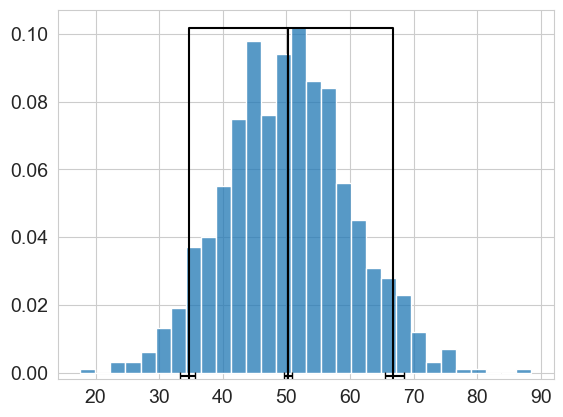

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

sns.set_style("whitegrid")

# Generate example i.i.d. simulation output data
np.random.seed(42)
data = np.random.normal(loc=50, scale=10, size=1000)
data.sort()

def create_more_plot(data, xlabel=None, figfname=None, ax=None):
    n = len(data)
    mean = np.mean(data)
    std_dev = np.std(data, ddof=1)
    sem = std_dev / np.sqrt(n)

    z = norm.ppf(0.975)
    mean_ci = (z * sem, z * sem)

    p_low, p_high = 5, 95
    percentile_low = np.percentile(data, p_low)
    percentile_high = np.percentile(data, p_high)


    beta_low = p_low / 100
    beta_high = p_high / 100

    percentile_low_ci = percentile_ci(beta_low, data, n, z)
    percentile_high_ci = percentile_ci(beta_high, data, n, z)

    # plt.figure(figsize=(20,8))
    if ax is None:
        ax = sns.histplot(data, bins=30, stat='probability')
    else:
        sns.histplot(data, bins=30, stat='probability', ax=ax)

    ax.axvline(mean, 0, 0.95, color='black')
    ax.errorbar(mean, -0.001, xerr= [[mean_ci[0]], [mean_ci[1]]], capsize=3, color="black")

    ax.axvline(percentile_low, 0, 0.95, color='black')
    ax.axvline(percentile_high, 0, 0.95, color='black')

    ymax = ax.get_ylim()[1]
    y_coord = 0.95 * ymax

    ax.hlines(y_coord,percentile_low, percentile_high,color='black')
    ax.errorbar(percentile_low, -0.001, xerr= [[percentile_low - percentile_low_ci[0]], [percentile_low_ci[1] - percentile_low]], capsize=3, color="black")
    ax.errorbar(percentile_high, -0.001, xerr= [[percentile_high - percentile_high_ci[0]], [percentile_high_ci[1] - percentile_high]], capsize=3, color="black")

    # ax.text(mean, y_coord, "LIKELY", ha="center", va="bottom", fontsize=20, color="g")
    # ax.text(percentile_low, y_coord, "UNLIKELY", ha="center", va="bottom", fontsize=20, color="r")
    # ax.text(percentile_high, y_coord, "UNLIKELY", ha="center", va="bottom", fontsize=20, color="r")

    # plt.title('MORE Plot: Measure of Risk and Error')
    # ax.set_xlabel('Number of Patients Seen')
    # ax.set_ylabel('Density')
    ax.set_ylabel('')
    # plt.tight_layout()

    # plt.legend(fontsize=18)
    # ax.set_xlabel(xlabel)

    ax.xaxis.label.set_size(18)
    ax.yaxis.label.set_size(18)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)

    ax.set_ylim(-0.002)
    # ax.set_xlim(0)

    if figfname is not None:
        plt.savefig(figfname, dpi=600)


def percentile_ci(beta, data, n, z):
    se = np.sqrt(beta * (1 - beta) / (n - 1))
    beta1 = beta - z * se
    beta2 = beta + z * se
    idx1 = int(np.floor(n * beta1))
    idx2 = int(np.floor(n * beta2))
    return data[max(0, idx1)], data[min(n - 1, idx2)]


create_more_plot(data)

In [17]:
import os
import json
import pandas as pd

In [18]:
# dfs = []
# for file_num in [*range(50, 101, 5)]:
#     with open(f"results/res1_{file_num}.json", 'r')as fin:
#         res = json.load(fin)

#     tmp_df = pd.DataFrame(res).reset_index().rename({"index":"metric"}, axis=1).melt("metric")
#     tmp_df["num_beds"] = file_num
#     tmp_df.rename({"variable":"max_emerg_wait"}, axis=1, inplace=True)

#     dfs.append(tmp_df)

In [19]:
# Saving res1 to file
# pd.concat(dfs).to_csv("results/res1_combined.csv", index=False)

In [20]:
import json
import pandas as pd

# dfs = []
# for file_num in [*range(50, 101, 5)]:
#     with open(f"results/res1_available_beds_{file_num}.json", 'r')as fin:
#         res = json.load(fin)

#     tmp_df = pd.DataFrame(res).reset_index().rename({"index":"metric"}, axis=1).melt("metric")
#     tmp_df["num_beds"] = file_num
#     tmp_df.rename({"variable":"max_emerg_wait"}, axis=1, inplace=True)

#     dfs.append(tmp_df)

# pd.concat(dfs).to_csv("results/res1_available_beds_combined.csv", index=False)

In [21]:
# Saving res2 to file

# res = []
# for i in range(0, 15):
#     with open(f"results/res2_additional_capacity_{i}.json", 'r')as fin:
#         res.append(json.load(fin))

In [22]:
# res2df = pd.concat([pd.DataFrame(r) for r in res], axis=1)

In [23]:
# res2df.to_csv("results/res2_additional_capacity.csv")

### Res 1 Analysis

In [24]:
df = pd.read_csv("results/res1_available_beds_combined.csv")
df["value"] = df["value"].apply(lambda r: [*map(float, r[1:-1].split(","))])

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


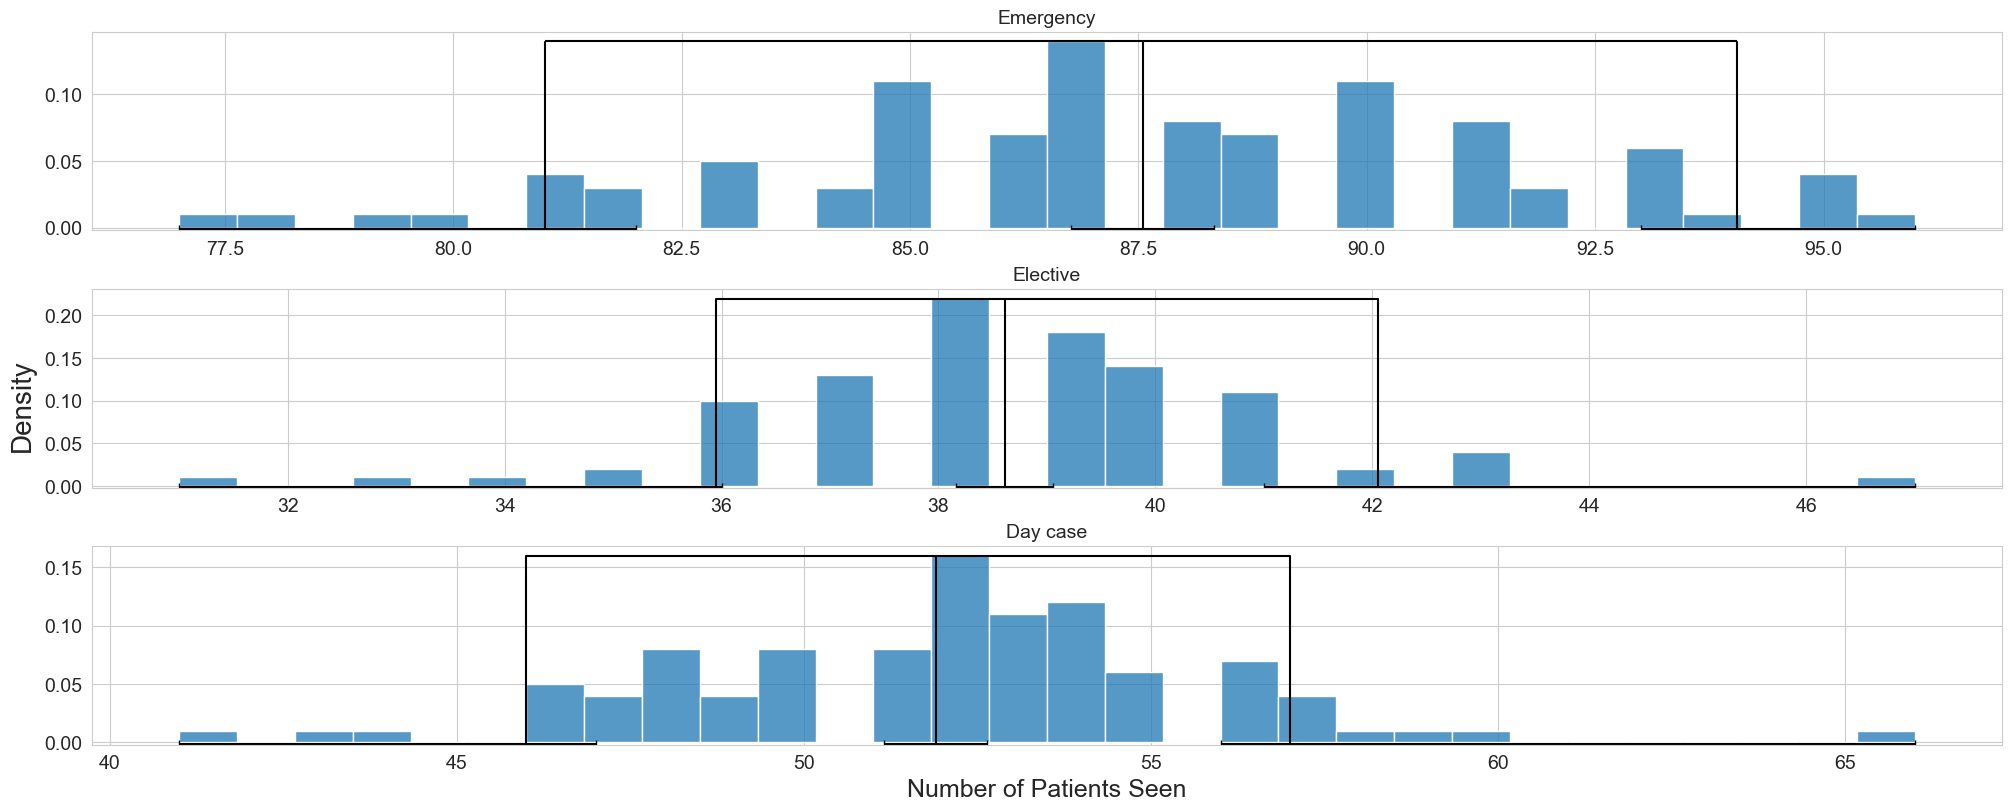

In [25]:
fig, ax = plt.subplots(3,1, constrained_layout=True)
fig.set_figheight(8)
fig.set_figwidth(20)

fig.supylabel("Density", fontsize=20)

ax[0].set_title("Emergency", fontsize=14)
create_more_plot(np.array(sorted(np.array(*df.query("max_emerg_wait == 7 & metric == 'emergency_patients_seen' & num_beds == 80")["value"]))), ax=ax[0])#, figfname="images/emergency_patients_seen_num_beds_80_max_wait_2")

ax[1].set_title("Elective", fontsize=14)
create_more_plot(np.array(sorted(np.array(*df.query("max_emerg_wait == 7 & metric == 'elective_patients_seen' & num_beds == 80")["value"]))), ax=ax[1])

ax[2].set_title("Day case", fontsize=14)
create_more_plot(np.array(sorted(np.array(*df.query("max_emerg_wait == 7 & metric == 'daycase_patients_seen' & num_beds == 80")["value"]))), ax=ax[2])
ax[2].set_xlabel("Number of Patients Seen")

plt.savefig("images/patients_seen_max_emerg_wait_7_num_beds_80.png", dpi=600)

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

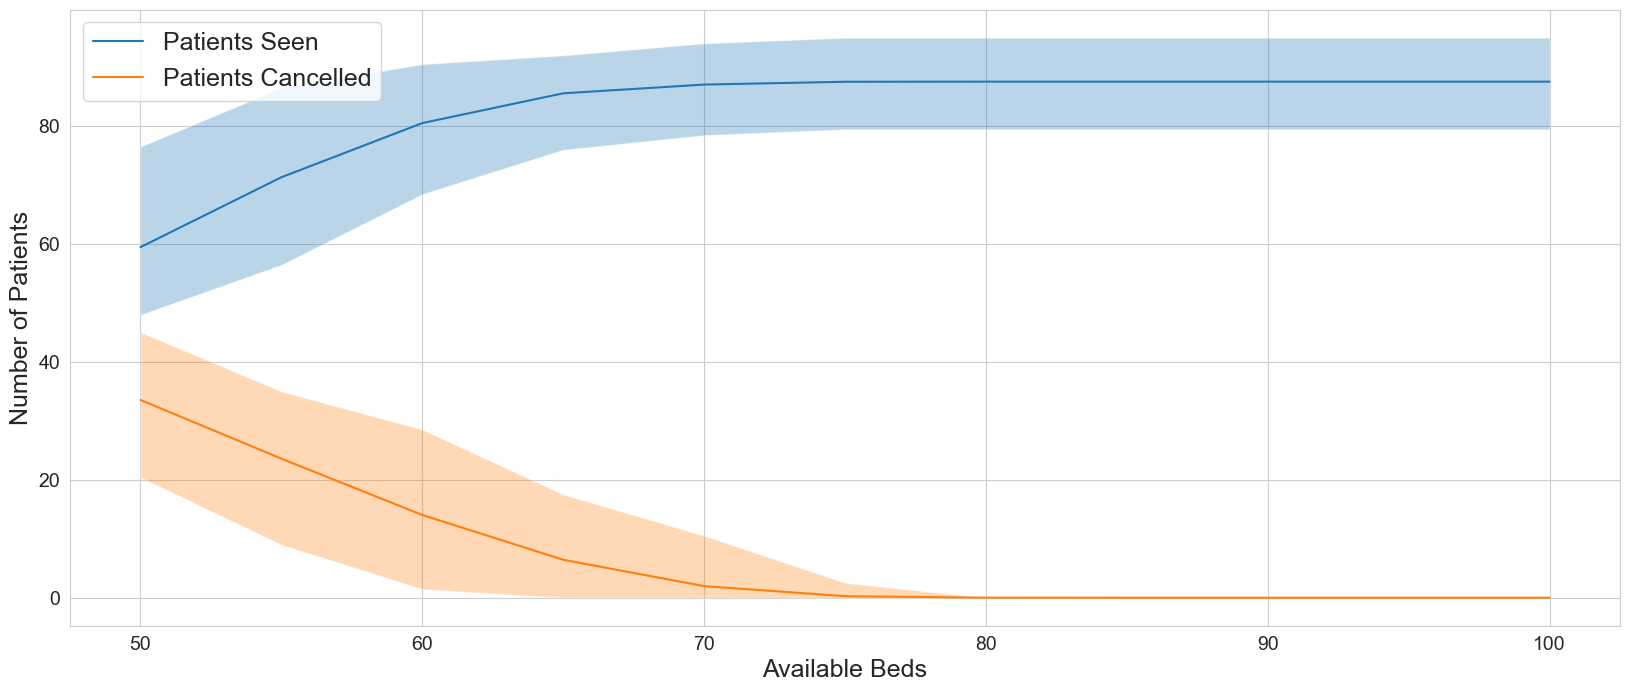

In [26]:
def create_seen_cancelled_plot(df1, df2, fname=None):
    means = df1["value"].apply(lambda r: np.array(r).mean())
    percentile_low = df1["value"].apply(lambda r: np.percentile(r, 2.5))
    percentile_high = df1["value"].apply(lambda r: np.percentile(r, 97.5))

    plt.figure(figsize=(20,8))

    ax = sns.lineplot(x = df1["num_beds"], y=means, label="Patients Seen")

    ax.fill_between(
        df1["num_beds"], 
        percentile_low, 
        percentile_high,
        alpha=0.3
    )


    means = df2["value"].apply(lambda r: np.array(r).mean())
    percentile_low = df2["value"].apply(lambda r: np.percentile(r, 2.5))
    percentile_high = df2["value"].apply(lambda r: np.percentile(r, 97.5))

    sns.lineplot(x = df2["num_beds"], y=means, ax=ax, label="Patients Cancelled")
    ax.fill_between(
        df2["num_beds"], 
        percentile_low, 
        percentile_high,
        alpha=0.3
    )

    plt.legend(fontsize=18)
    ax.set_xlabel("Available Beds")
    ax.set_ylabel("Number of Patients")

    ax.xaxis.label.set_size(18)
    ax.yaxis.label.set_size(18)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)

    if fname is not None:
        plt.savefig(fname, dpi=600)

create_seen_cancelled_plot(df.query(f"max_emerg_wait == 2 & metric == 'emergency_patients_seen'"), df.query("max_emerg_wait == 2 & metric == 'emergency_patients_cancelled'"))

In [27]:
hists = []

tmp_df = df.query(f"max_emerg_wait == 2 & metric == 'emergency_patients_seen'")
max_bins = int(round(tmp_df["value"].apply(lambda r: max(r)).max()*1.2))

for row in tmp_df["value"]:
    hists.append(np.histogram(row, bins=range(0, max_bins, 2))[0])

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

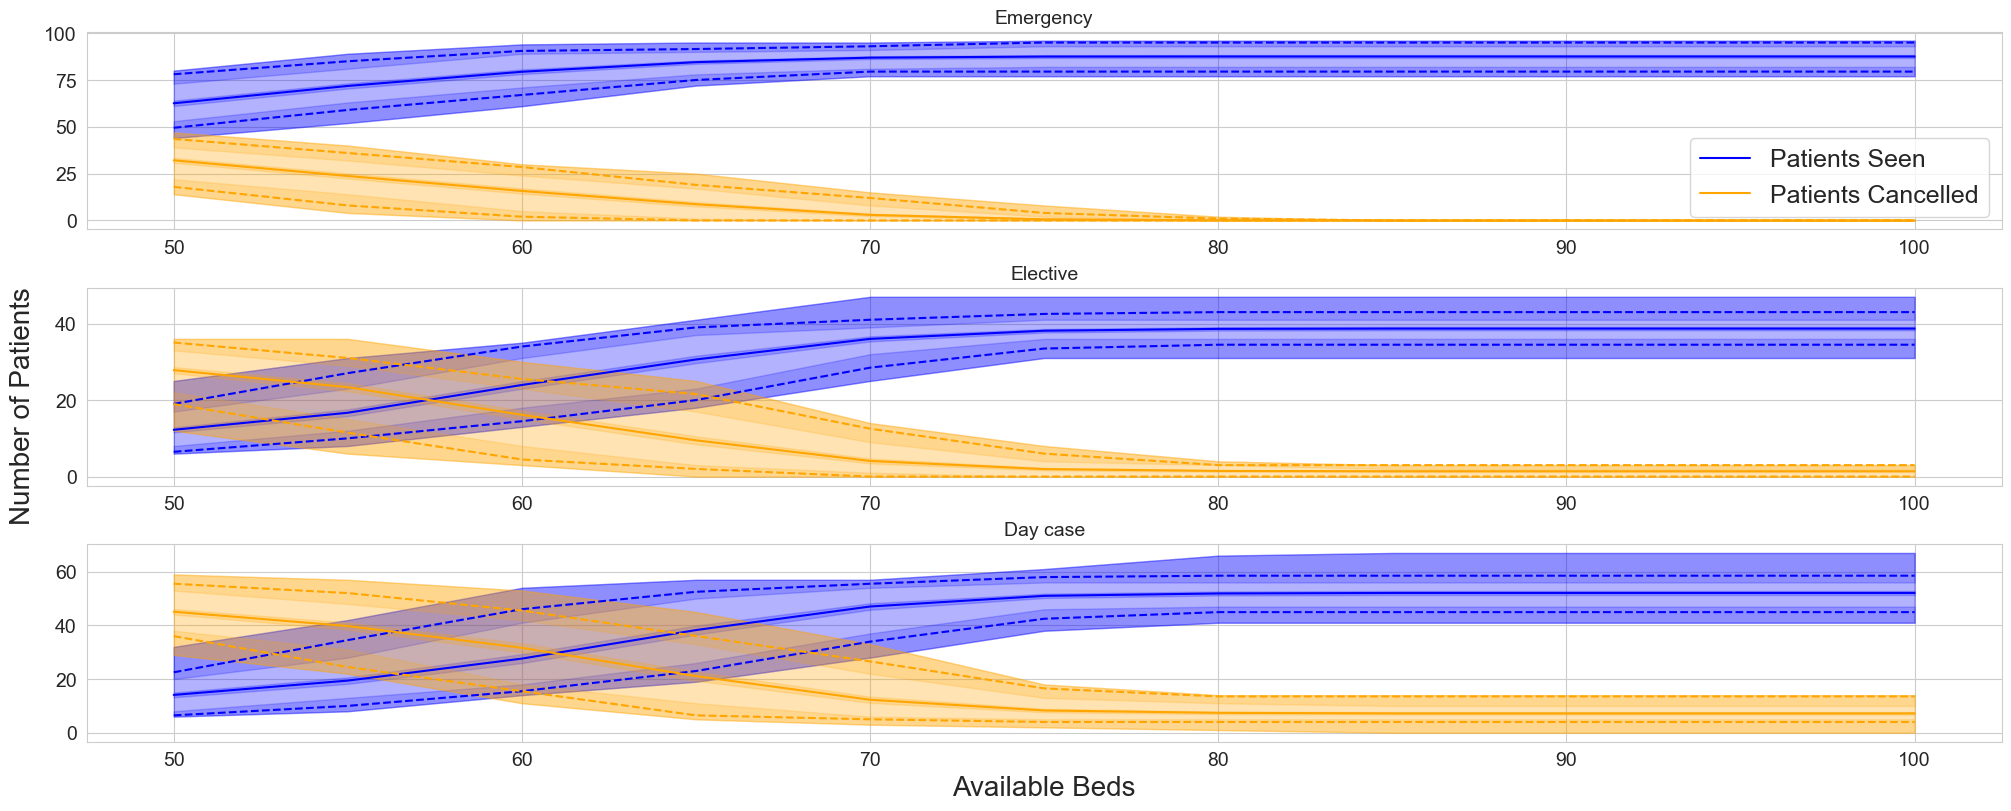

<Figure size 2000x800 with 0 Axes>

<Figure size 2000x800 with 0 Axes>

<Figure size 2000x800 with 0 Axes>

In [91]:
def create_seen_cancelled_plot2(df1, df2=None, x_col="num_beds", y_col="value", fname=None, ax=None):
    means = df1[y_col].apply(lambda r: np.array(r).mean())
    low = df1[y_col].apply(lambda r: np.percentile(r, 0))
    high = df1[y_col].apply(lambda r: np.percentile(r, 100))

    percentile_low = df1[y_col].apply(lambda r: np.percentile(r, 2.5))
    percentile_high = df1[y_col].apply(lambda r: np.percentile(r, 97.5))

    plt.figure(figsize=(20,8))

    if ax is not None:
        sns.lineplot(x = df1[x_col], y=means, label="Patients Seen", color='b', ax=ax)
    else:
        ax = sns.lineplot(x = df1[x_col], y=means, label="Patients Seen", color='b')
    sns.lineplot(x = df1[x_col], y = percentile_low, linestyle='--', color='b', ax=ax)
    sns.lineplot(x = df1[x_col], y = percentile_high, linestyle='--', color='b', ax=ax)

    n = len(df1[y_col].iloc[0])
    std_dev = df1[y_col].apply(lambda r: np.array(r).std())
    sem = std_dev / np.sqrt(n)

    z = norm.ppf(0.975)
    mean_ci = (means - z * sem, means + z * sem)

    beta_low = 5 / 100
    beta_high = 95 / 100

    low_ci = calculate_percentile_ci(beta_low, df1, n, z, y_col)
    low_ci = [*zip(*low_ci)]

    high_ci = calculate_percentile_ci(beta_high, df1, n, z, y_col)
    high_ci = [*zip(*high_ci)]

    ax.fill_between(
        df1[x_col], 
        low, 
        high,
        alpha=0.3,
        color='b'
    )
    ax.fill_between(
        df1[x_col],
        mean_ci[0],
        mean_ci[1],
        alpha=0.2,
        color='b'
    )
    ax.fill_between(
        df1[x_col],
        low_ci[0],
        low_ci[1],
        alpha=0.2,
        color='b'
    )
    ax.fill_between(
        df1[x_col],
        high_ci[0],
        high_ci[1],
        alpha=0.2,
        color='b'
    )

    if df2 is not None:
        means = df2["value"].apply(lambda r: np.array(r).mean())
        low = df2["value"].apply(lambda r: np.percentile(r, 0))
        high = df2["value"].apply(lambda r: np.percentile(r, 100))

        percentile_low = df2["value"].apply(lambda r: np.percentile(r, 2.5))
        percentile_high = df2["value"].apply(lambda r: np.percentile(r, 97.5))

        sns.lineplot(x = df2[x_col], y=means, label="Patients Cancelled", color='orange', ax=ax)
        sns.lineplot(x = df2[x_col], y = percentile_low, linestyle='--', color='orange', ax=ax)
        sns.lineplot(x = df2[x_col], y = percentile_high, linestyle='--', color='orange', ax=ax)

        n = len(df2["value"].iloc[0])
        std_dev = df2["value"].apply(lambda r: np.array(r).std())
        sem = std_dev / np.sqrt(n)

        z = norm.ppf(0.975)
        mean_ci = (means - z * sem, means + z * sem)

        beta_low = 5 / 100
        beta_high = 95 / 100

        low_ci = calculate_percentile_ci(beta_low, df2, n, z, y_col)
        low_ci = [*zip(*low_ci)]

        high_ci = calculate_percentile_ci(beta_high, df2, n, z, y_col)
        high_ci = [*zip(*high_ci)]

        ax.fill_between(
            df2[x_col], 
            low, 
            high,
            alpha=0.3,
            color='orange'
        )
        ax.fill_between(
            df2[x_col],
            mean_ci[0],
            mean_ci[1],
            alpha=0.2,
            color='orange'
        )
        ax.fill_between(
            df2[x_col],
            low_ci[0],
            low_ci[1],
            alpha=0.2,
            color='orange'
        )
        ax.fill_between(
            df2[x_col],
            high_ci[0],
            high_ci[1],
            alpha=0.2,
            color='orange'
        )


    # ax.legend(fontsize=18)
    ax.set_xlabel("")
    # ax.set_xlabel(x_col)
    ax.set_ylabel("")

    ax.xaxis.label.set_size(18)
    ax.yaxis.label.set_size(18)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)

    if fname is not None:
        plt.savefig(fname, dpi=600)

    # return ax

def calculate_percentile_ci(beta, df, n, z, ycol):
    se = np.sqrt(beta * (1 - beta) / (n - 1))
    beta1 = beta - z * se
    beta2 = beta + z * se

    idx1 = int(np.floor(n * beta1))
    idx2 = int(np.floor(n * beta2))

    return df[ycol].apply(lambda r: (sorted(r)[max(0, idx1)], sorted(r)[min(n - 1, idx2)]))


fig, ax = plt.subplots(3,1, constrained_layout=True)
fig.set_figheight(8)
fig.set_figwidth(20)

fig.supylabel("Number of Patients", fontsize=20)

ax[0].set_title("Emergency", fontsize=14)
create_seen_cancelled_plot2(df.query(f"max_emerg_wait == 7 & metric == 'emergency_patients_seen'"), df.query("max_emerg_wait == 7 & metric == 'emergency_patients_cancelled'"), ax=ax[0])#fname="images/emergency_patients_seen_max_wait_time_2.png",
ax[0].legend(fontsize=18)

ax[1].set_title("Elective", fontsize=14)
create_seen_cancelled_plot2(df.query(f"max_emerg_wait == 7 & metric == 'elective_patients_seen'"), df.query("max_emerg_wait == 7 & metric == 'elective_patients_cancelled'"), ax=ax[1])
ax[1].legend().remove()

ax[2].set_title("Day case", fontsize=14)
create_seen_cancelled_plot2(df.query(f"max_emerg_wait == 7 & metric == 'daycase_patients_seen'"), df.query("max_emerg_wait == 7 & metric == 'daycase_patients_cancelled'"), ax=ax[2])


ax[2].set_xlabel("Available Beds")
ax[2].xaxis.label.set_size(20)
ax[2].legend().remove()

fig.savefig("images/patients_seen_max_emerg_wait_7.png")

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

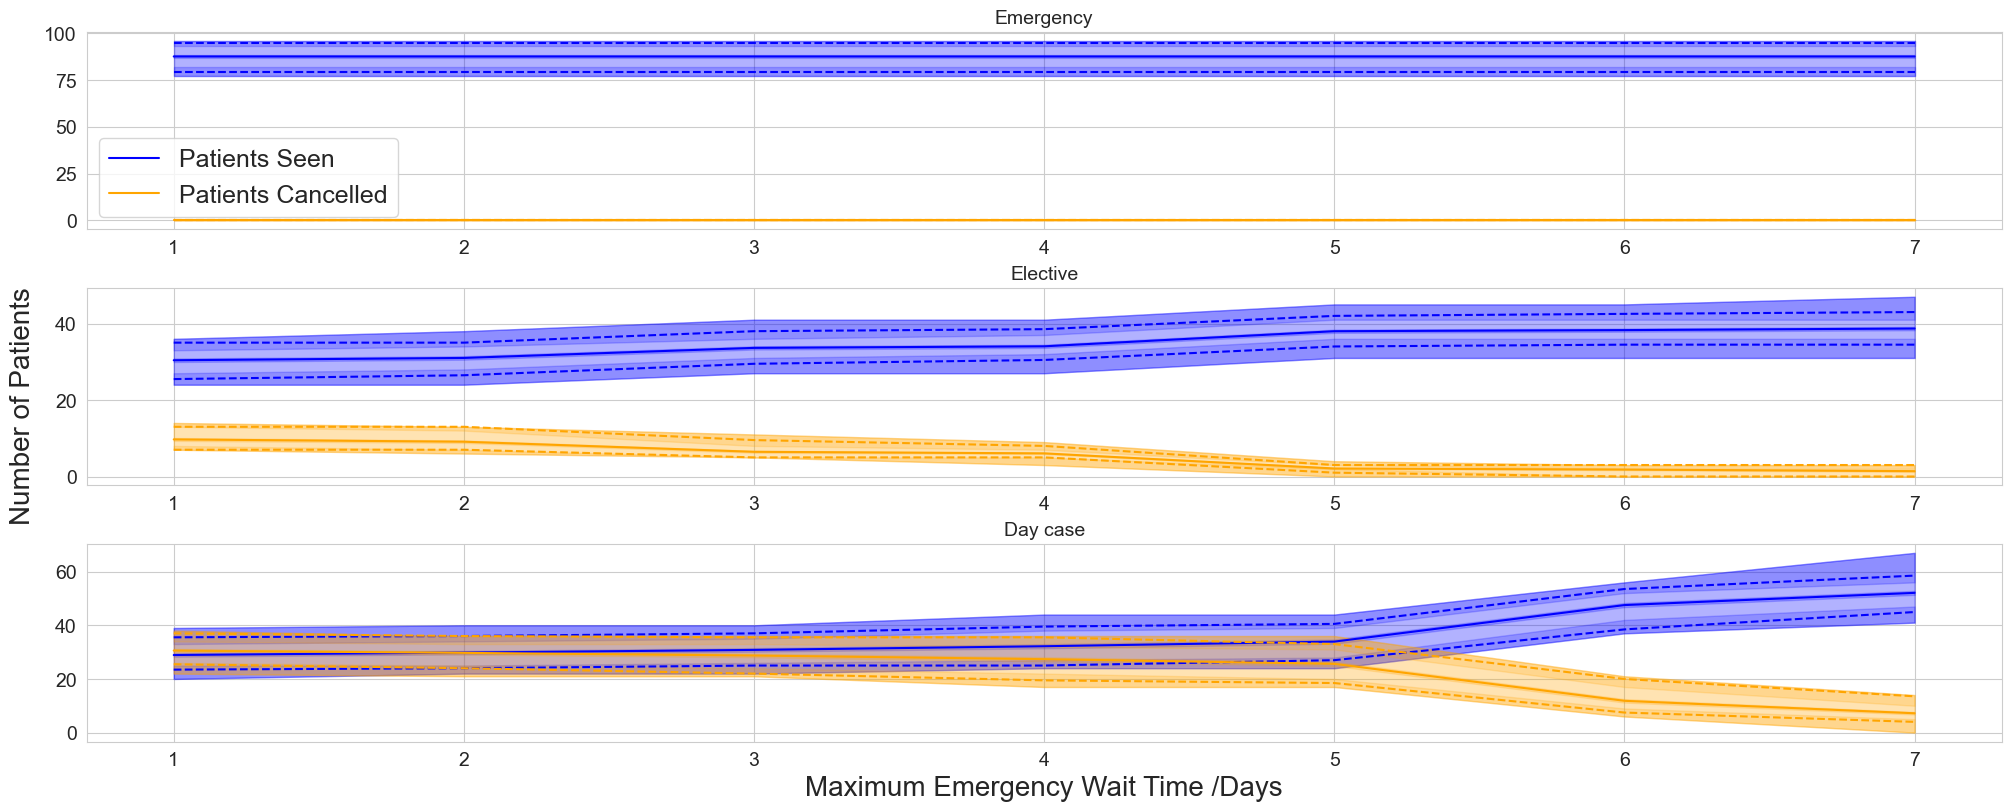

<Figure size 2000x800 with 0 Axes>

<Figure size 2000x800 with 0 Axes>

<Figure size 2000x800 with 0 Axes>

In [29]:
fig, ax = plt.subplots(3,1, constrained_layout=True)
fig.set_figheight(8)
fig.set_figwidth(20)

fig.supylabel("Number of Patients", fontsize=20)

ax[0].set_title("Emergency", fontsize=14)
create_seen_cancelled_plot2(df.query(f"num_beds == 100 & metric == 'emergency_patients_seen'"), df.query("num_beds == 100 & metric == 'emergency_patients_cancelled'"), ax=ax[0], x_col="max_emerg_wait")#fname="images/emergency_patients_seen_max_wait_time_2.png",
ax[0].legend(fontsize=18)

ax[1].set_title("Elective", fontsize=14)
create_seen_cancelled_plot2(df.query(f"num_beds == 100 & metric == 'elective_patients_seen'"), df.query("num_beds == 100 & metric == 'elective_patients_cancelled'"), ax=ax[1],  x_col="max_emerg_wait")
ax[1].legend().remove()

ax[2].set_title("Day case", fontsize=14)
create_seen_cancelled_plot2(df.query(f"num_beds == 100 & metric == 'daycase_patients_seen'"), df.query("num_beds == 100 & metric == 'daycase_patients_cancelled'"), ax=ax[2],  x_col="max_emerg_wait")


ax[2].set_xlabel("Maximum Emergency Wait Time /Days")
ax[2].xaxis.label.set_size(20)
ax[2].legend().remove()

fig.savefig("images/patients_seen_num_beds_100.png")

In [30]:
df

,metric,max_emerg_wait,value,num_beds
0,emergency_patients_seen,1,"[60.0, 62.0, 53.0, 60.0, 48.0, 49.0, 59.0, 58....",50
1,elective_patients_seen,1,"[14.0, 12.0, 6.0, 10.0, 9.0, 5.0, 7.0, 8.0, 12...",50
2,daycase_patients_seen,1,"[14.0, 10.0, 5.0, 6.0, 6.0, 6.0, 8.0, 6.0, 7.0...",50
3,emergency_patients_cancelled,1,"[32.0, 37.0, 41.0, 29.0, 38.0, 40.0, 33.0, 37....",50
4,elective_patients_cancelled,1,"[25.0, 35.0, 32.0, 31.0, 33.0, 37.0, 33.0, 32....",50
...,...,...,...,...
688,elective_patients_cancelled,7,"[2.0, 0.0, 2.0, 1.0, 2.0, 2.0, 2.0, 2.0, 0.0, ...",100
689,daycase_patients_cancelled,7,"[9.0, 5.0, 7.0, 14.0, 6.0, 8.0, 5.0, 5.0, 4.0,...",100
690,emergency_surgery,7,"[148.75000000000003, 140.52499999999998, 144.8...",100
691,elective_surgery,7,"[80.1875, 85.5625, 79.875, 81.125, 80.75, 79.6...",100


C:\Users\christopher.sampson\AppData\Local\Temp\ipykernel_16888\1750546865.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["means"]=df["value"].apply(lambda r: np.mean(r))


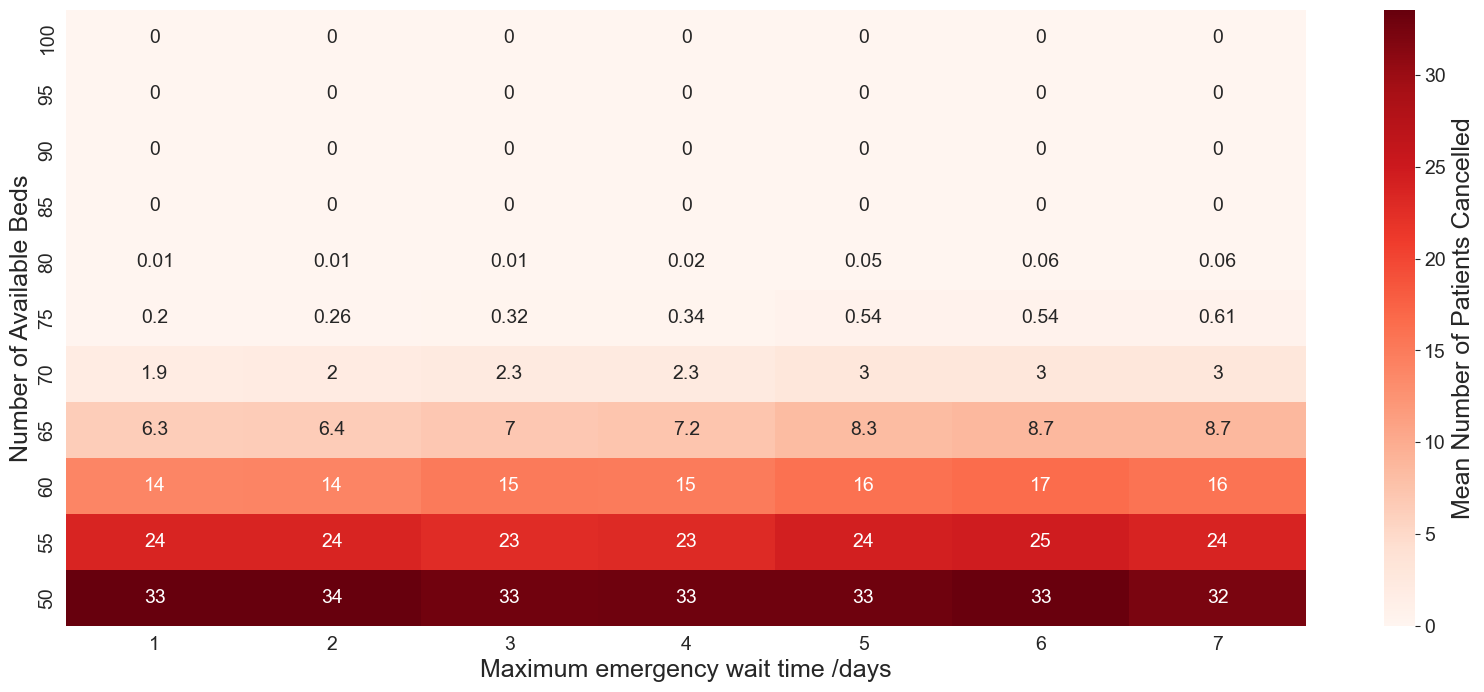

In [31]:

def plot_heatmap(df, fname=None):
    fig = plt.figure(figsize=(20, 8))

    df["means"]=df["value"].apply(lambda r: np.mean(r))

    ax = sns.heatmap(df.pivot(index="num_beds",columns="max_emerg_wait",values="means"), cbar_kws={'label': 'Mean Number of Patients Cancelled'}, cmap='Reds',annot=True, annot_kws={'size':14})
    ax.invert_yaxis()

    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=14)
    ax.figure.axes[-1].yaxis.label.set_size(18)
    

    # ax.set_xlabel("Available Beds")
    ax.set_xlabel("Maximum emergency wait time /days")
    ax.set_ylabel("Number of Available Beds")

    ax.xaxis.label.set_size(18)
    ax.yaxis.label.set_size(18)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)

    if fname is not None:
        plt.savefig(fname, dpi=600)

plot_heatmap(df.query("metric == 'emergency_patients_cancelled'"))

plt.savefig("images/heatmap_emergency_cancellation.png")

C:\Users\christopher.sampson\AppData\Local\Temp\ipykernel_16888\1750546865.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["means"]=df["value"].apply(lambda r: np.mean(r))


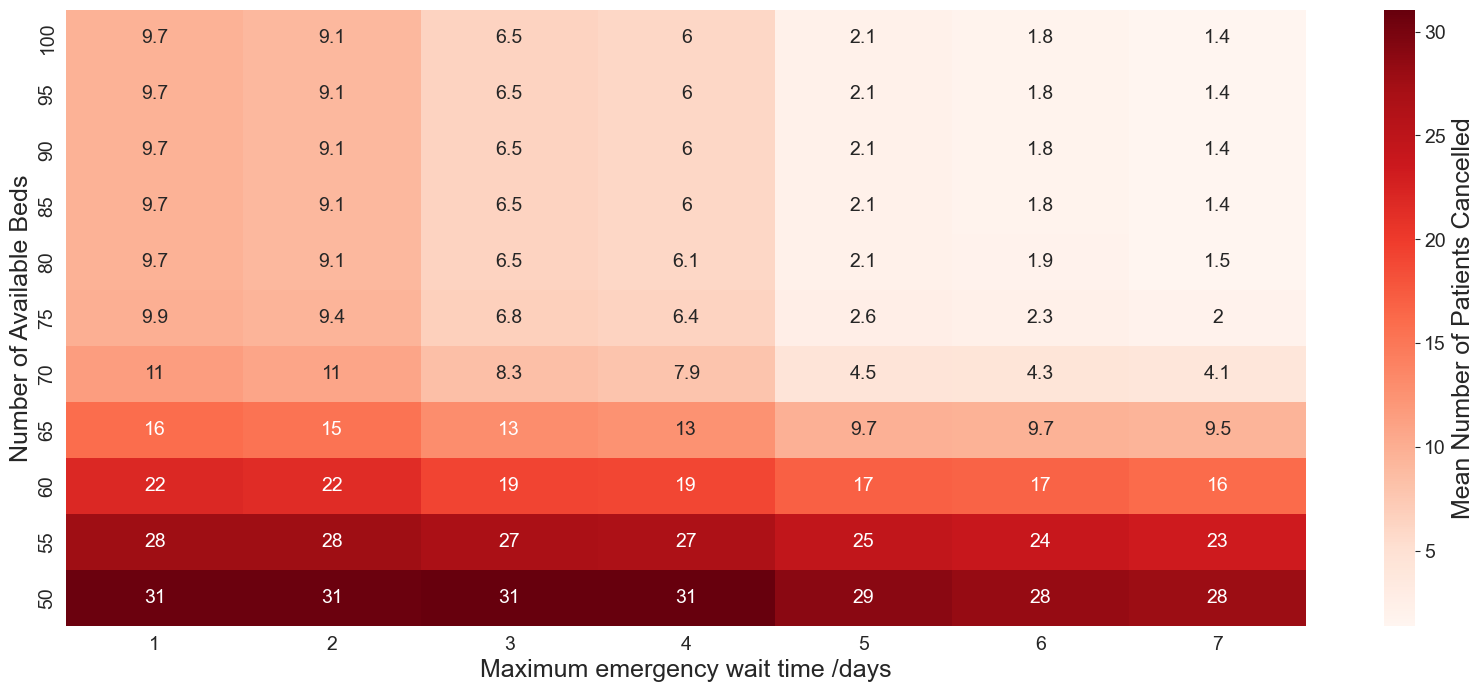

In [32]:
plot_heatmap(df.query("metric == 'elective_patients_cancelled'"))

plt.savefig("images/heatmap_elective_cancellation.png")

C:\Users\christopher.sampson\AppData\Local\Temp\ipykernel_16888\1750546865.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["means"]=df["value"].apply(lambda r: np.mean(r))


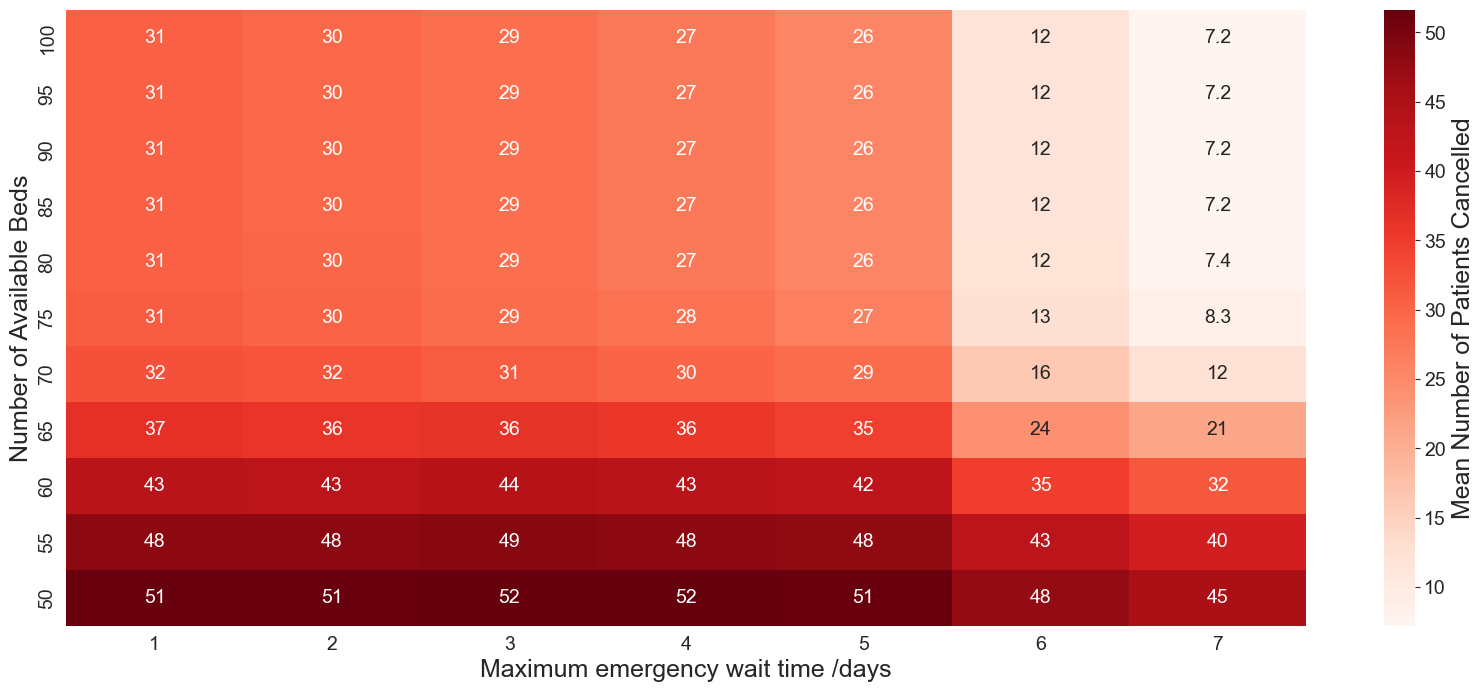

In [33]:
plot_heatmap(df.query("metric == 'daycase_patients_cancelled'"))

plt.savefig("images/heatmap_daycase_cancellation.png")

## Emergency Event



In [34]:
emerg_df = pd.read_csv("results/res2_additional_capacity.csv",index_col=0)
emerg_df = pd.DataFrame([[[*map(float, y[1:-1].split(","))] for y in x] for x in emerg_df.values], columns=emerg_df.columns, index=emerg_df.index)
emerg_df=emerg_df.reset_index().melt(id_vars=["index"]).rename({"index":"metric","variable":"num_days"},axis=1)

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

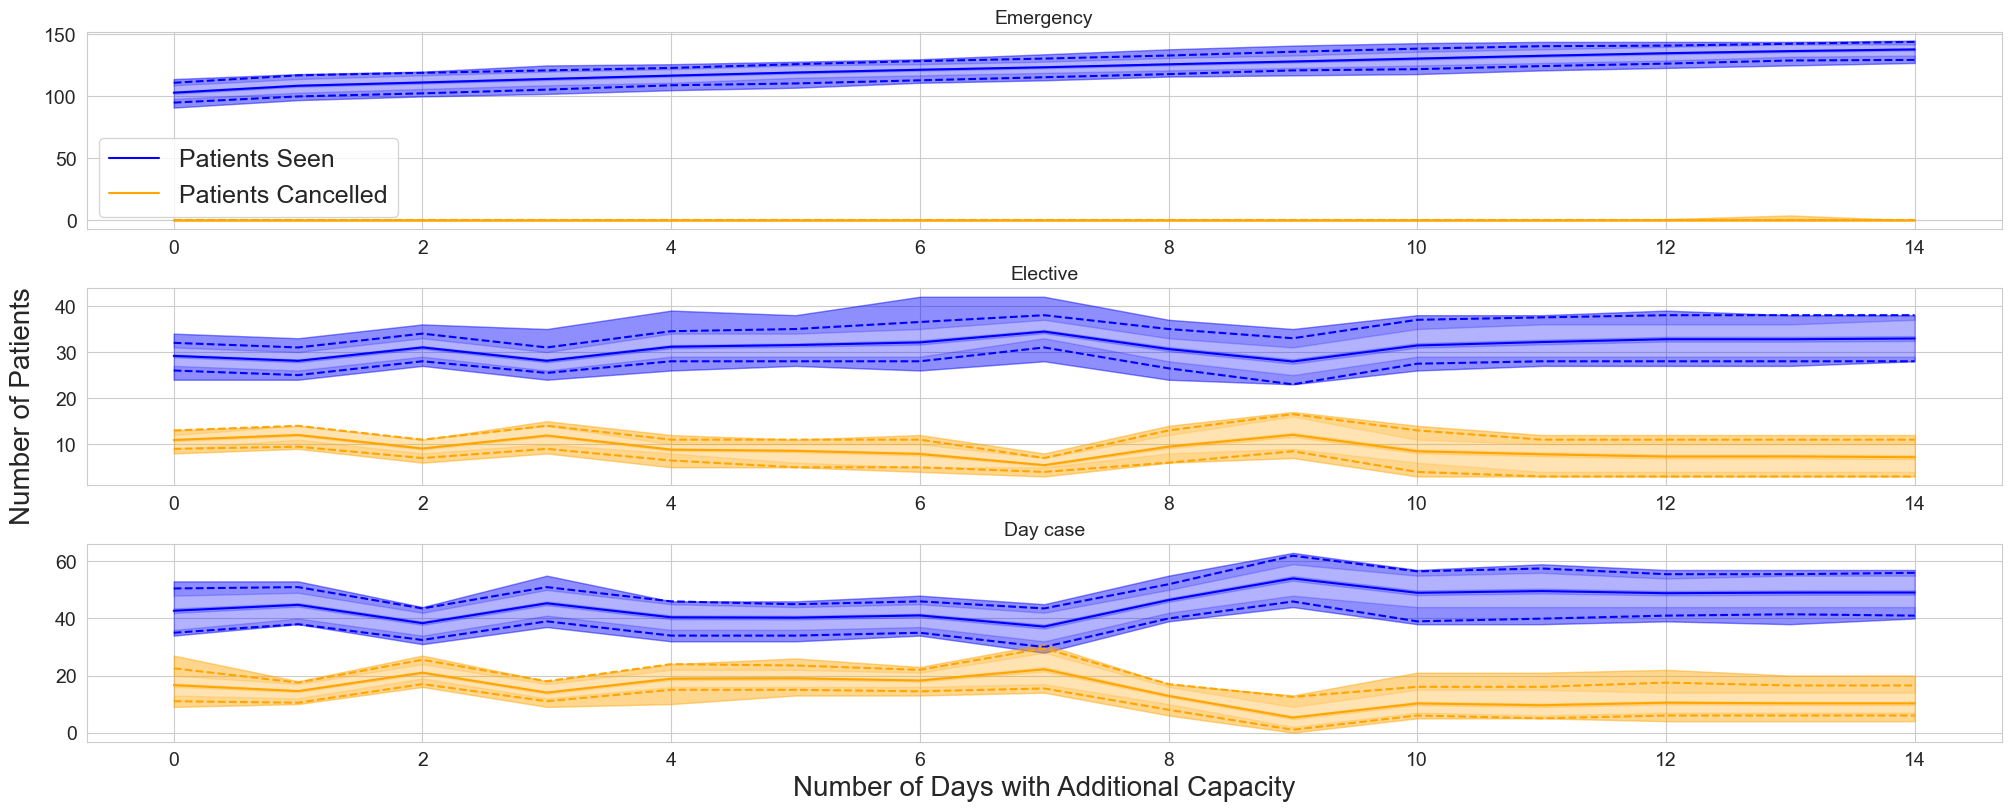

<Figure size 2000x800 with 0 Axes>

<Figure size 2000x800 with 0 Axes>

<Figure size 2000x800 with 0 Axes>

In [94]:
# create_seen_cancelled_plot2(emerg_df.query("metric == 'elective_patients_seen'"), emerg_df.query("metric == 'elective_patients_cancelled'"), "num_days")


fig, ax = plt.subplots(3,1, constrained_layout=True)
fig.set_figheight(8)
fig.set_figwidth(20)

fig.supylabel("Number of Patients", fontsize=20)

ax[0].set_title("Emergency", fontsize=14)
create_seen_cancelled_plot2(emerg_df.query("metric == 'emergency_patients_seen'"), emerg_df.query("metric == 'emergency_patients_cancelled'"), ax=ax[0],  x_col="num_days")
ax[0].legend(fontsize=18)

ax[1].set_title("Elective", fontsize=14)
create_seen_cancelled_plot2(emerg_df.query("metric == 'elective_patients_seen'"), emerg_df.query("metric == 'elective_patients_cancelled'"), ax=ax[1],  x_col="num_days")
ax[1].legend().remove()

ax[2].set_title("Day case", fontsize=14)
create_seen_cancelled_plot2(emerg_df.query("metric == 'daycase_patients_seen'"), emerg_df.query("metric == 'daycase_patients_cancelled'"), ax=ax[2],  x_col="num_days")


ax[2].set_xlabel("Number of Days with Additional Capacity")
ax[2].xaxis.label.set_size(20)
ax[2].legend().remove()

fig.savefig("images/additional_capacity_emerg_event.png")

In [83]:
emerg_df.query("metric == 'emergency_surgery'")

total_slots = pd.read_csv("results/total_slots.csv")
emerg_df["num_days"] = pd.to_numeric(emerg_df["num_days"])

emerg_slots = total_slots.query("patient_type == 'Emergency'")["hours_total"].values[0]
elec_slots = total_slots.query("patient_type == 'Elective'")["hours_total"].values[0]
daycase_slots = total_slots.query("patient_type == 'Daycase'")["hours_total"].values[0]

# emerg_df.query("metric == 'emergency_surgery'")["value"].apply(lambda r: np.array(r) / )

emerg_surgery_df = emerg_df.query("metric == 'emergency_surgery'").copy()
emerg_surgery_df.loc[:, "theatre_utilisation"] = emerg_surgery_df.apply(lambda r: np.array(r["value"]) / (emerg_slots+(5*r["num_days"])), axis=1)

elec_surgery_df = emerg_df.query("metric == 'elective_surgery'").copy()
elec_surgery_df.loc[:, "theatre_utilisation"] = elec_surgery_df.apply(lambda r: np.array(r["value"]) / elec_slots, axis=1)

daycase_surgery_df = emerg_df.query("metric == 'daycase_surgery'").copy()
daycase_surgery_df.loc[:, "theatre_utilisation"] = daycase_surgery_df.apply(lambda r: np.array(r["value"]) / daycase_slots, axis=1)

In [ ]:
# Use the same as above? for Theatre utilisation??

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

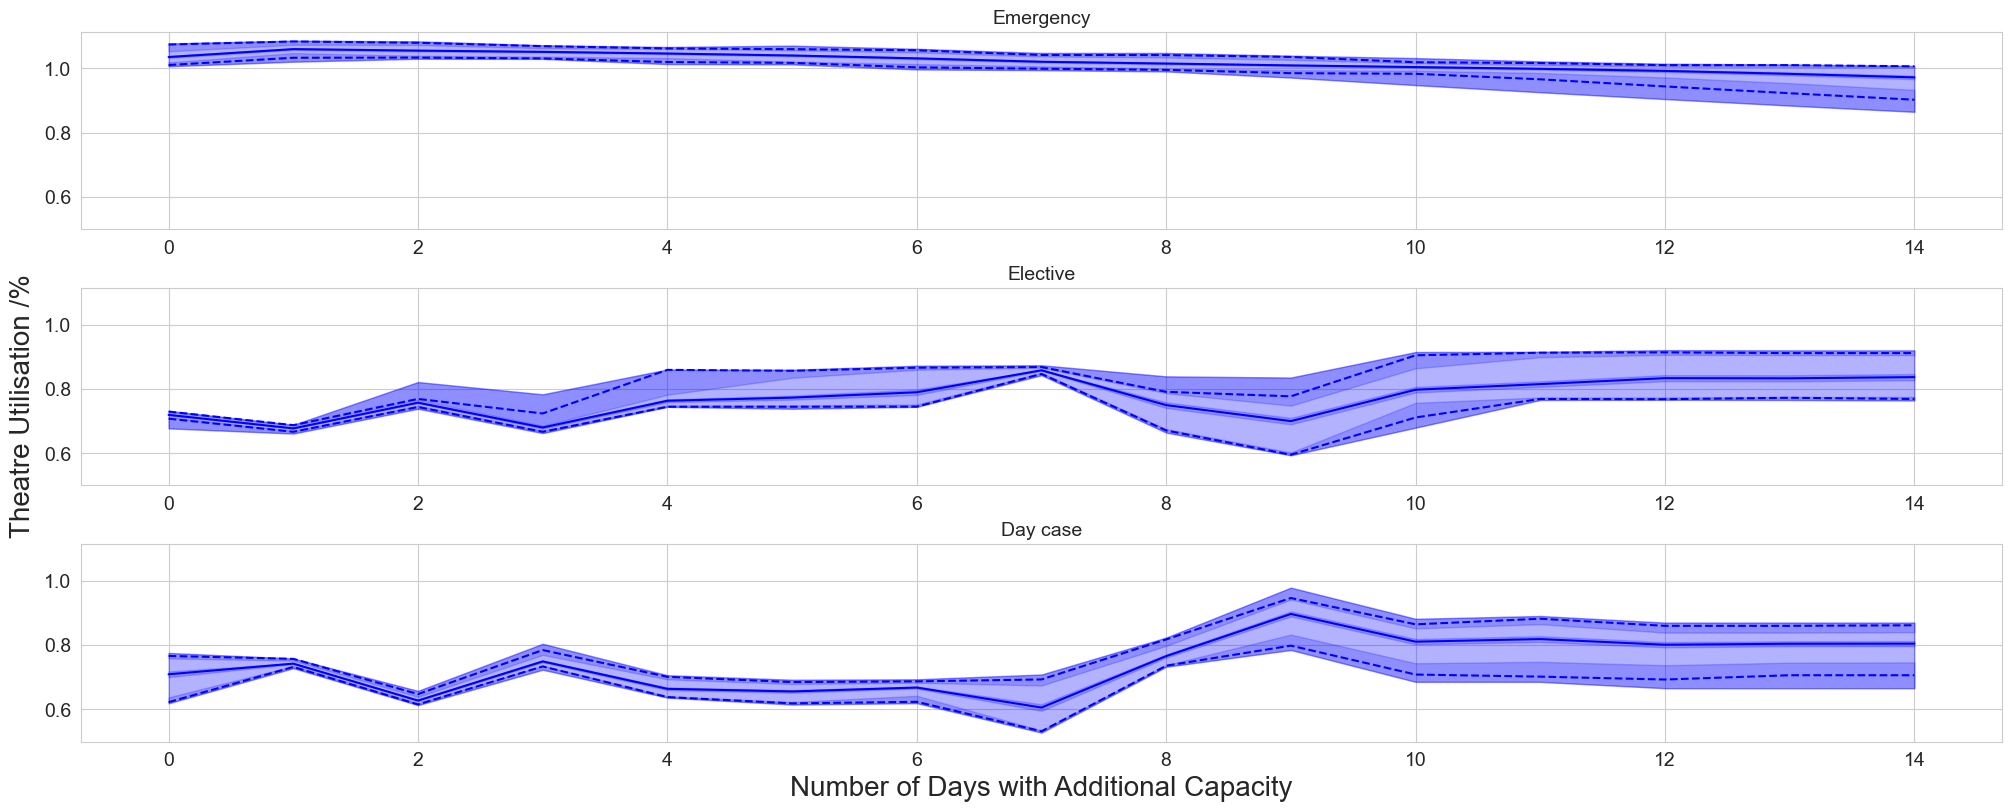

<Figure size 2000x800 with 0 Axes>

<Figure size 2000x800 with 0 Axes>

<Figure size 2000x800 with 0 Axes>

In [97]:


fig, ax = plt.subplots(3,1, constrained_layout=True, sharey=True)
fig.set_figheight(8)
fig.set_figwidth(20)

fig.supylabel("Theatre Utilisation /%", fontsize=20)

ax[0].set_title("Emergency", fontsize=14)
create_seen_cancelled_plot2(emerg_surgery_df, x_col="num_days", y_col="theatre_utilisation", ax=ax[0])
ax[0].legend().remove()

ax[1].set_title("Elective", fontsize=14)
create_seen_cancelled_plot2(elec_surgery_df, x_col="num_days", y_col="theatre_utilisation", ax=ax[1])
ax[1].legend().remove()

ax[2].set_title("Day case", fontsize=14)
create_seen_cancelled_plot2(daycase_surgery_df, x_col="num_days", y_col="theatre_utilisation", ax=ax[2])


ax[2].set_xlabel("Number of Days with Additional Capacity")
ax[2].xaxis.label.set_size(20)
ax[2].legend().remove()

fig.savefig("images/additional_capacity_emerg_event_theatre_utilisation.png")